In [39]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

In [40]:
# BASE_URL = "http://127.0.0.1:4011"
BASE_URL = "https://api-split-building-limits.onrender.com"

## Vaterlandsparken

In [56]:
with open('../tests/input_files/vaterlandsparken.json') as user_file:
  input_json = json.load(user_file)
params = {"gcs":"EPSG:4326", "pcs":"EPSG:3857"}
response = requests.post(url=f"{BASE_URL}/split", json=input_json, params=params)

In [57]:
response.json()

{'id': 225,
 'split_building_limits': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[10.75678086443506, 59.91291413160555],
       [10.757212163013266, 59.913509268463564],
       [10.757867266534337, 59.91339283457274],
       [10.757486364709461, 59.91285434826322],
       [10.75678086443506, 59.91291413160555]]]},
    'properties': {'elevation': 3.63}},
   {'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[10.756996990155885, 59.91321236033006],
       [10.756312148602724, 59.91334421009501],
       [10.756398999995643, 59.91346700000333],
       [10.756516000002959, 59.913633000004204],
       [10.757212163013254, 59.91350926846357],
       [10.756996990155885, 59.91321236033006]]]},
    'properties': {'elevation': 4.63}},
   {'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[10.75628300000438, 59.91330300000502],
       [10.756312148602724, 59.913344

In [58]:
gcs="EPSG:4326"
pcs="EPSG:3857"
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"], crs=gcs).to_crs(pcs)
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"], crs=gcs).to_crs(pcs)
result_gdf = gpd.GeoDataFrame.from_features(response.json()["split_building_limits"], crs=gcs).to_crs(pcs)

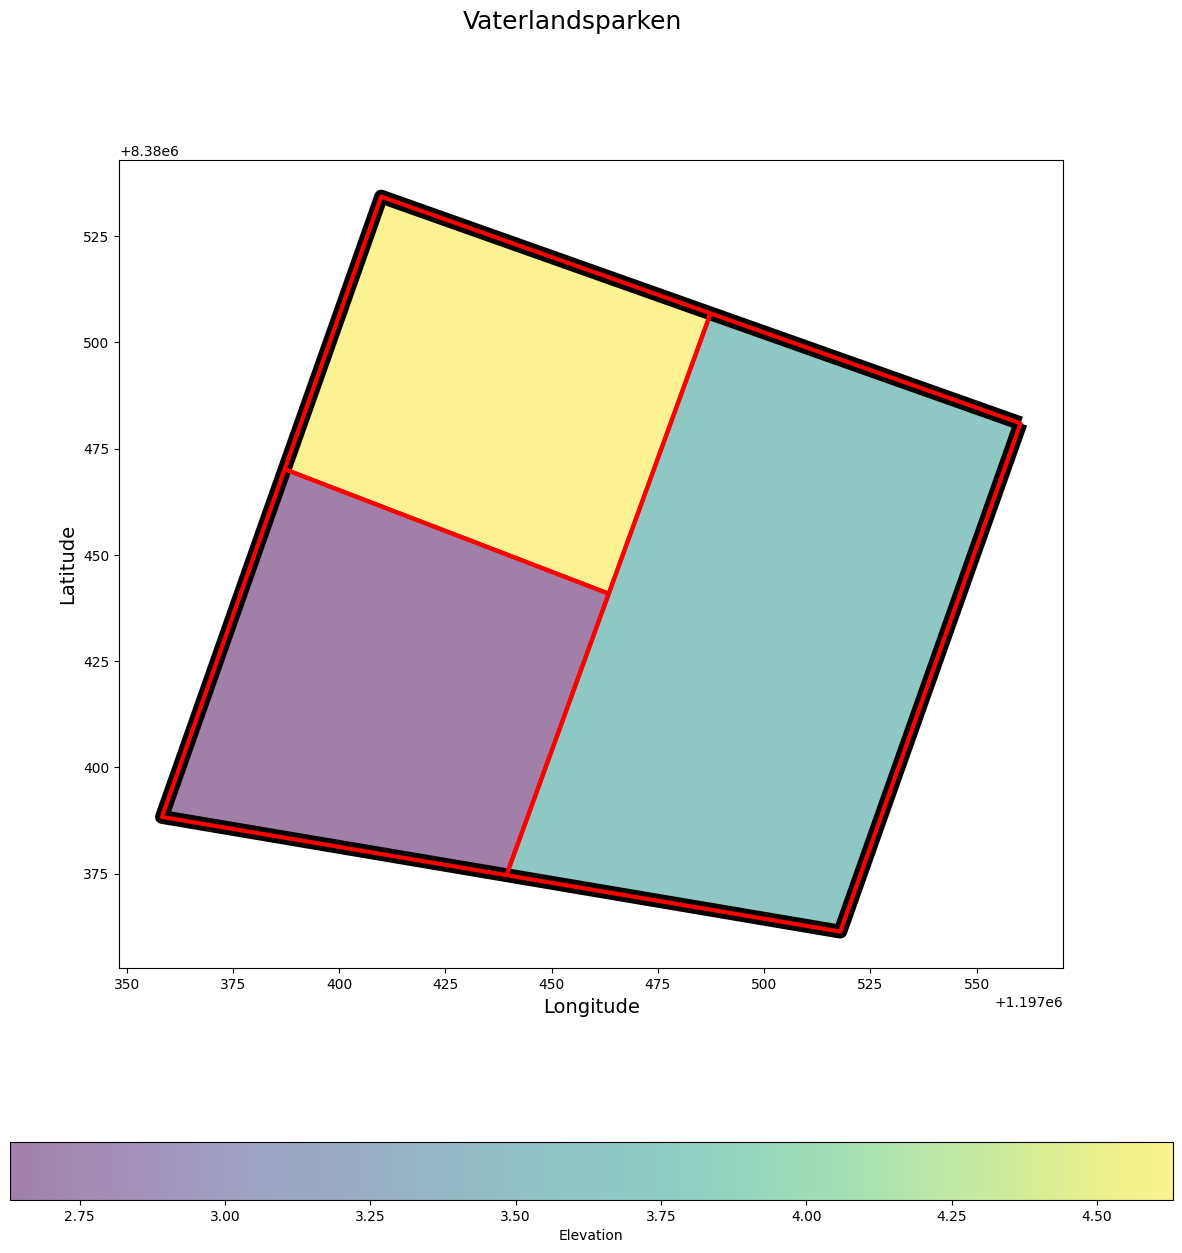

In [59]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
fig.suptitle('Vaterlandsparken', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
ax.tick_params(labelsize=10)
_ = plt.plot()

## Plateaus covering building limit

In [51]:
with open('../tests/input_files/plateaus_covering_building_limit.json') as user_file:
  input_json = json.load(user_file)
response = requests.post(url=f"{BASE_URL}/split", json=input_json)

In [52]:
response.json()

{'id': 224,
 'split_building_limits': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[0.0, 0.0],
       [0.0, 10.0],
       [5.0, 10.0],
       [5.0, 0.0],
       [0.0, 0.0]]]},
    'properties': {'elevation': 3.63}},
   {'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[5.0, 0.0],
       [5.0, 10.0],
       [10.0, 10.0],
       [10.0, 0.0],
       [5.0, 0.0]]]},
    'properties': {'elevation': 4.63}}]}}

In [53]:
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])
result_gdf = gpd.GeoDataFrame.from_features(response.json()["split_building_limits"])

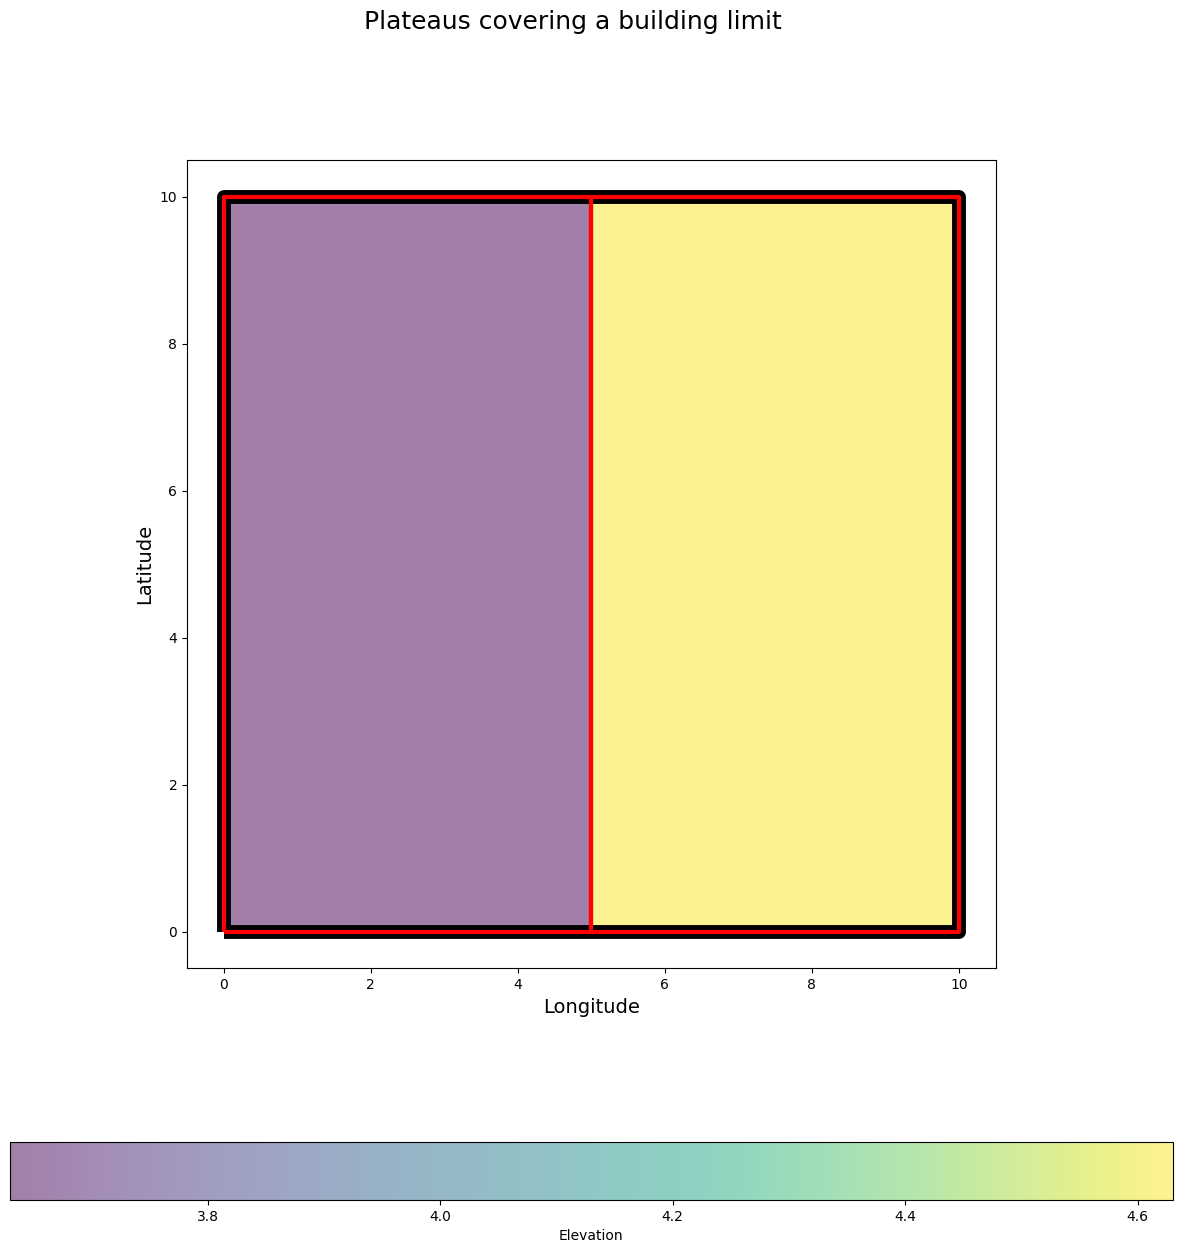

In [54]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
fig.suptitle('Plateaus covering a building limit', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
ax.tick_params(labelsize=10)
_ = plt.plot()

## Plateaus covering multiple building limits

In [47]:
with open('../tests/input_files/plateaus_covering_multiple_building_limits.json') as user_file:
  input_json = json.load(user_file)
response = requests.post(url=f"{BASE_URL}/split", json=input_json)

In [48]:
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])
result_gdf = gpd.GeoDataFrame.from_features(response.json()["split_building_limits"])

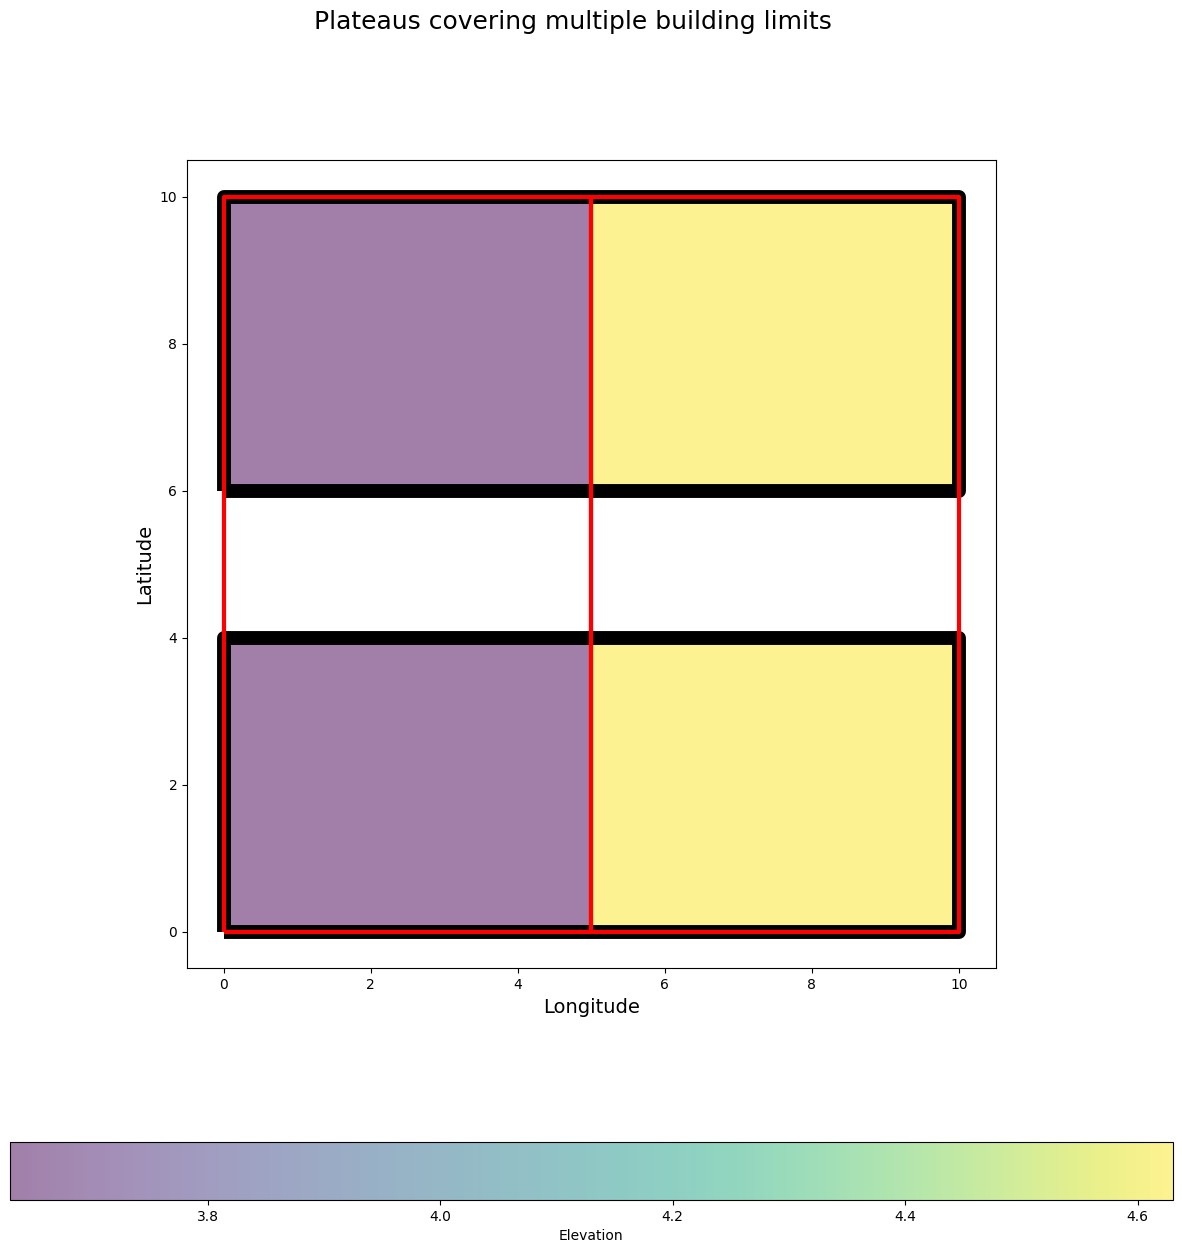

In [49]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
fig.suptitle('Plateaus covering multiple building limits', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
ax.tick_params(labelsize=10)
_ = plt.plot()

## Plateau exceeding building limit

In [41]:
with open('../tests/input_files/plateaus_exceeding_building_limit.json') as user_file:
  input_json = json.load(user_file)
response = requests.post(url=f"{BASE_URL}/split", json=input_json)

In [42]:
building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])
result_gdf = gpd.GeoDataFrame.from_features(response.json()["split_building_limits"])

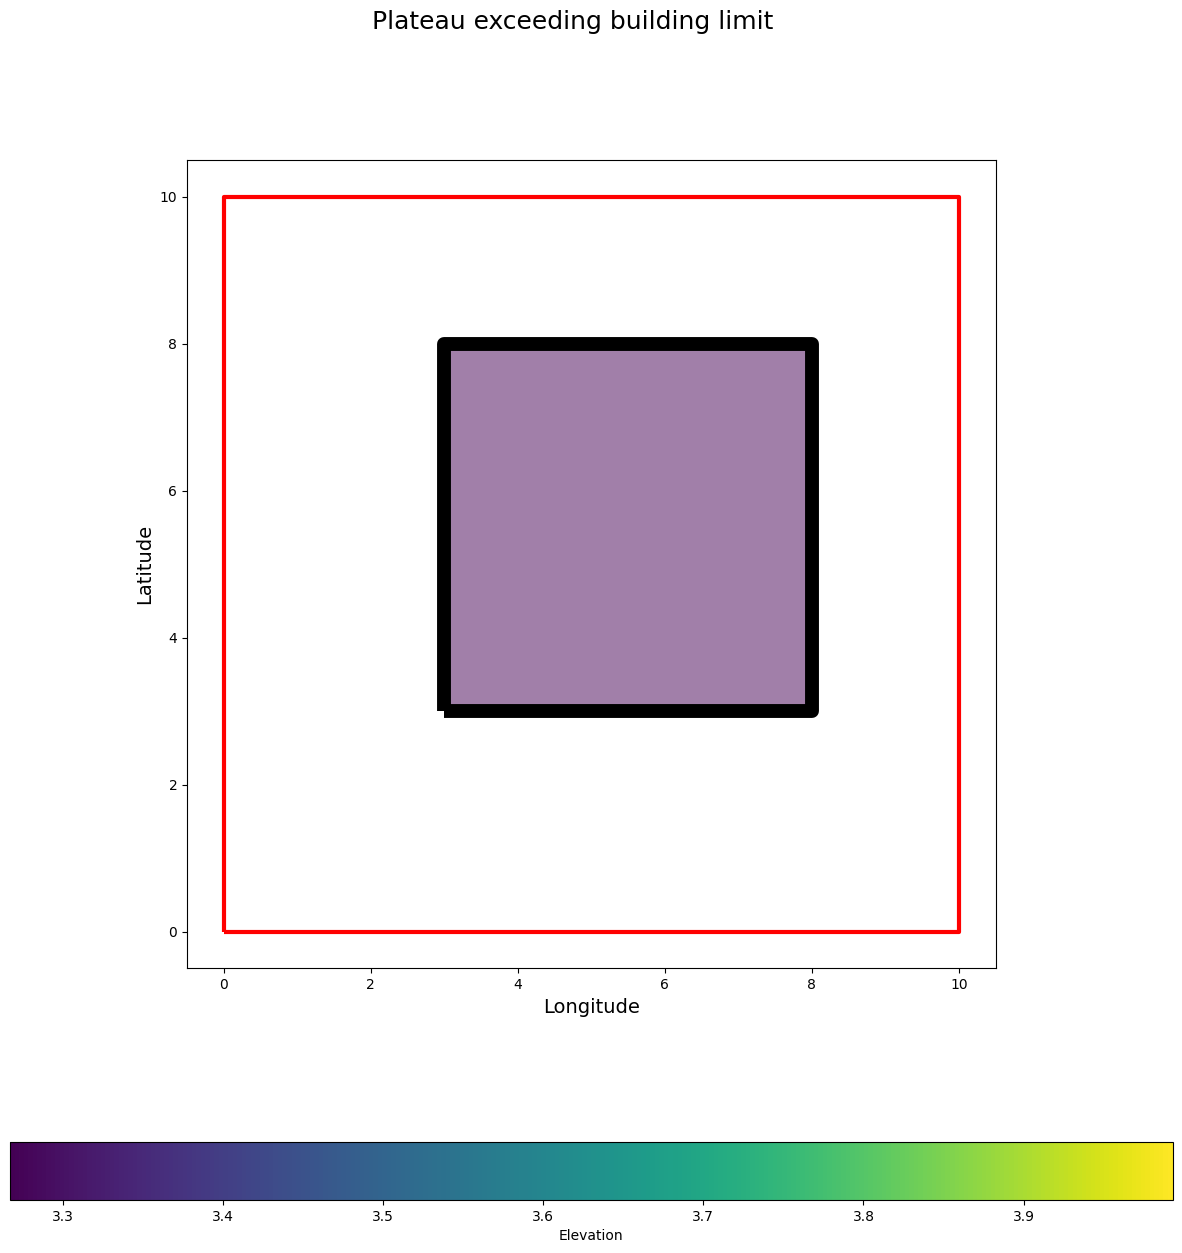

In [45]:
fig, ax = plt.subplots(figsize=(15, 15))
_ = result_gdf.plot(ax=ax, alpha=0.5, column="elevation", legend=True, legend_kwds={"label": "Elevation", "orientation": "horizontal", "alpha":0.5},)
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
fig.suptitle('Plateau exceeding building limit', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
ax.tick_params(labelsize=10)
_ = plt.plot()

## Not supported: Building limit with inner holes

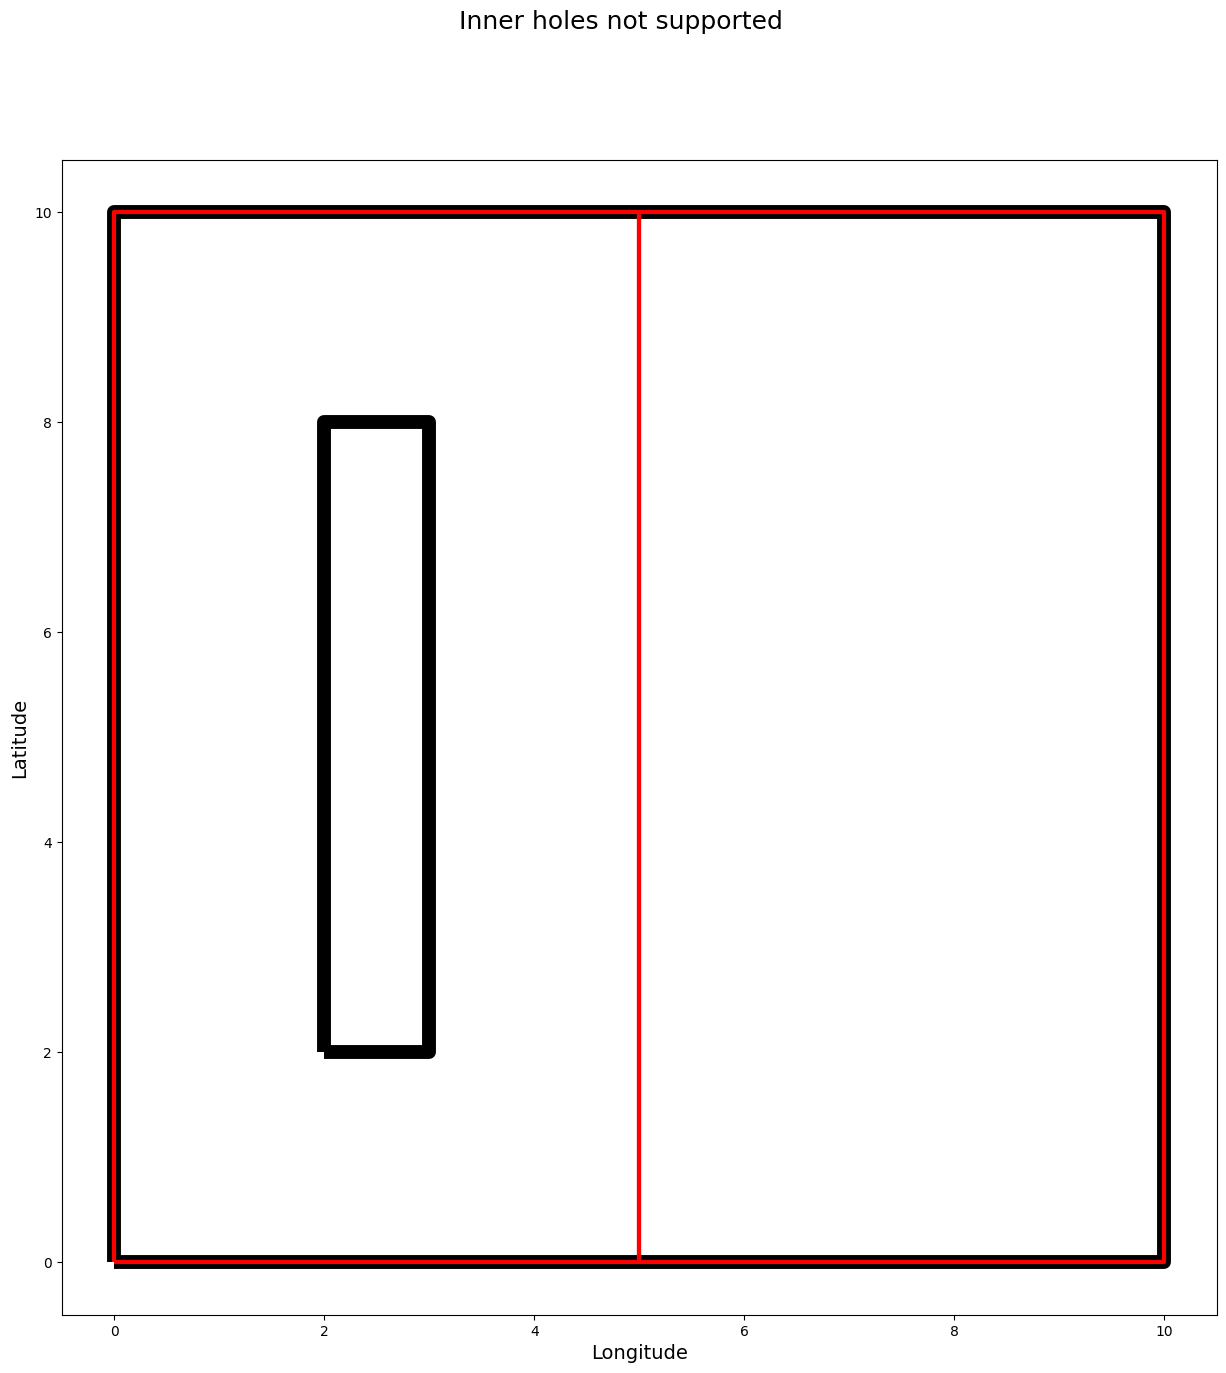

In [24]:
with open('../tests/input_files/building_limit_with_holes_error.json') as user_file:
  input_json = json.load(user_file)

building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])

fig, ax = plt.subplots(figsize=(15, 15))
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
fig.suptitle('Inner holes not supported', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
ax.tick_params(labelsize=10)
_ = plt.plot()

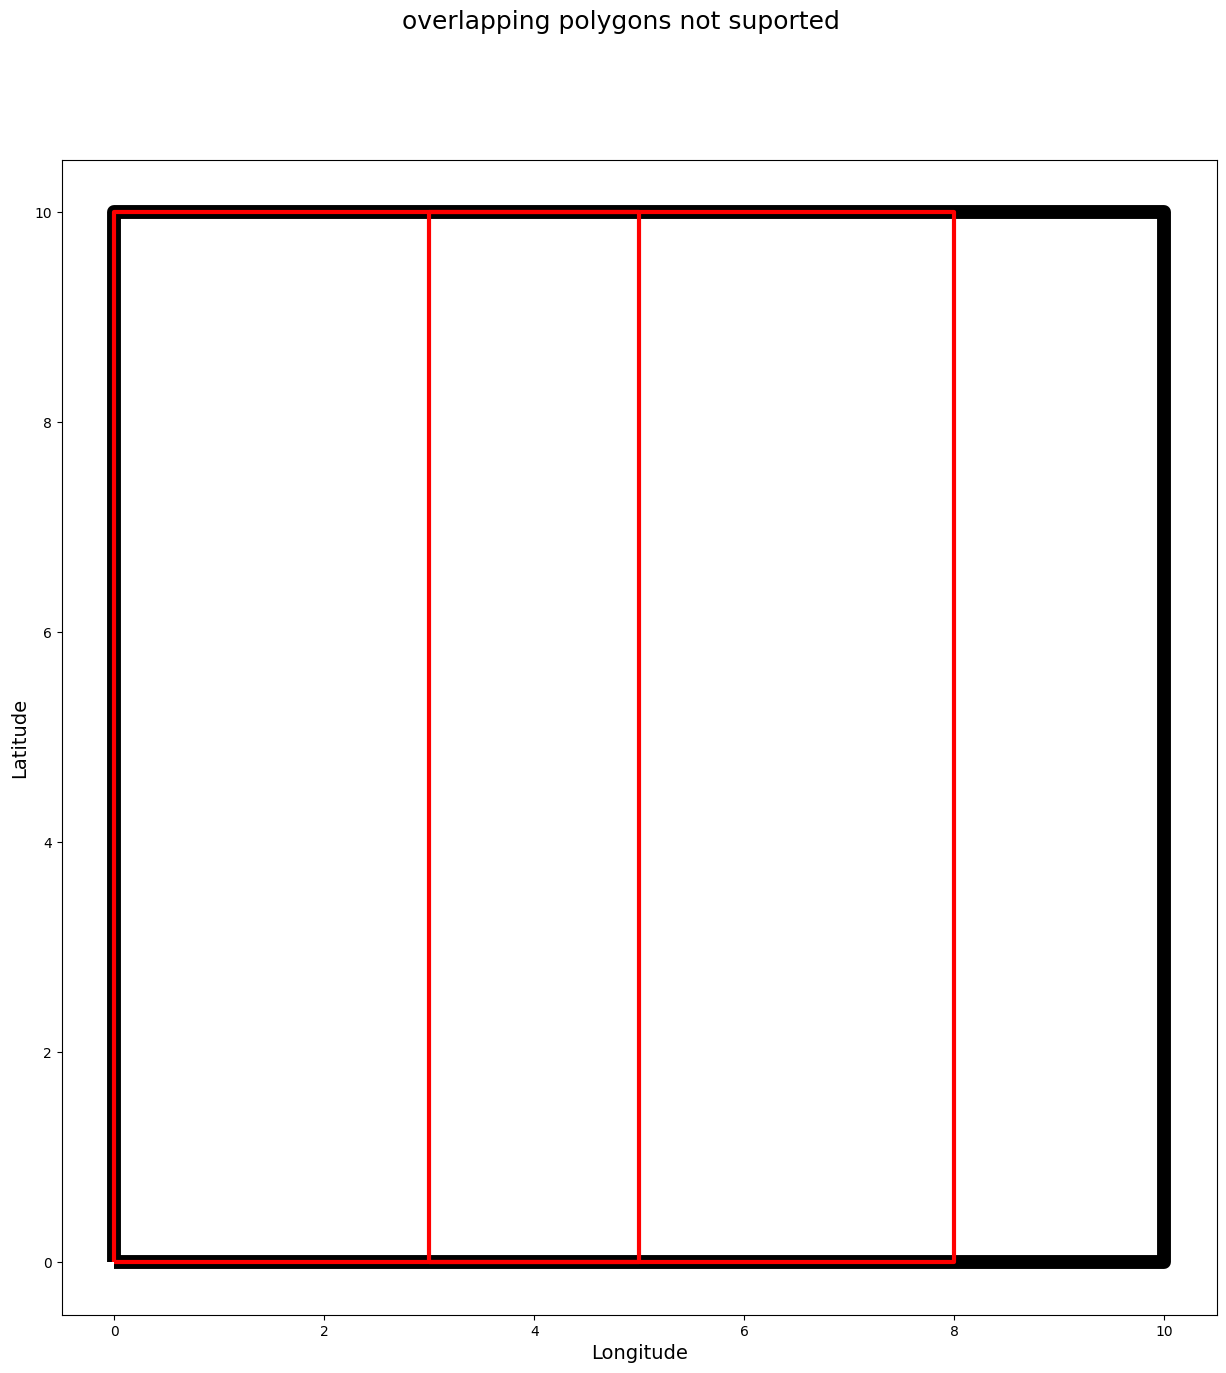

In [28]:
with open('../tests/input_files/overlapping_height_plateaus_error.json') as user_file:
  input_json = json.load(user_file)

building_limits_gdf = gpd.GeoDataFrame.from_features(input_json["building_limits"])
height_plateaus_gdf = gpd.GeoDataFrame.from_features(input_json["height_plateaus"])

fig, ax = plt.subplots(figsize=(15, 15))
_ = building_limits_gdf.plot(ax=ax, alpha=1, edgecolor="black", linewidth=10, facecolor="none")
_ = height_plateaus_gdf.plot(ax=ax, alpha=1, edgecolor="red", linewidth=3, facecolor="none")
fig.suptitle('overlapping polygons not suported', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
ax.tick_params(labelsize=10)
_ = plt.plot()